In [ ]:
pip install --upgrade google-cloud-bigquery pandas pyarrow matplotlib seaborn

### SUMMARY

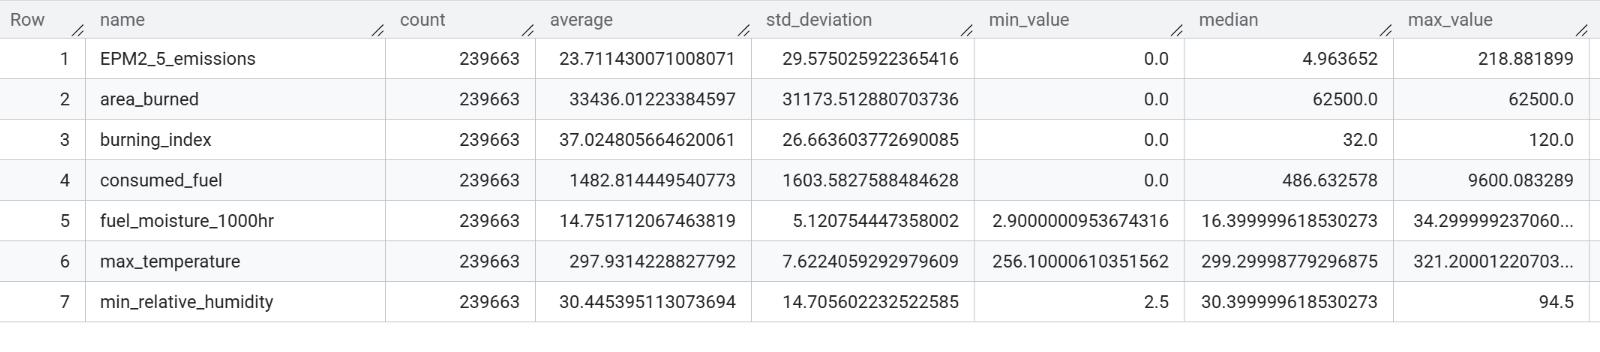

### Skewed Fire Impacts: The Majority of Damage is from a Few Large Events

The metrics for area_burned, consumed_fuel, and EPM2_5_emissions all tell a similar story. Notice how for each of them, the average is much higher than the median.

area_burned: Average: 33.4, Median: 0

consumed_fuel: Average: 1,483, Median: 487

EPM2_5_emissions: Average: 23.7, Median: 5.0

This indicates a strong right-skewed distribution. In simple terms, the vast majority of fire events are small and have a low impact. However, a few rare, extreme events are so massive that they pull the "average" way up.

The most telling statistic is that the median area_burned is 0. This means that more than half of all fire incidents in your dataset are incredibly small, likely covering less than a single data pixel or study area. Your fire problem is not defined by the "typical" fire, but by the rare, catastrophic ones.

### Symmetric Environmental Conditions: Weather is More Predictable

In contrast, the metrics for the environmental conditions look very different. For these variables, the average and median are very close, which points to a symmetric, "bell-curve" like distribution.

max_temperature: Average: 297.9 K (76.6°F / 24.8°C), Median: 299.3 K (79.1°F / 26.2°C)

min_relative_humidity: Average: 30.4%, Median: 30.4%

fuel_moisture_1000hr: Average: 14.7%, Median: 16.4%

This is what we'd expect from natural weather patterns. Temperatures, humidity, and fuel moisture fluctuate around a central value without the kind of extreme, landscape-altering outliers we see in the fire impact data.

### Key Takeaways & Next Steps

### Don't Trust the Average for Fire Impacts:

Because of the extreme skew, using the "average" area burned or emissions can be misleading. The median is a much better representation of a "typical" fire event in your dataset.

### Focus on the Outliers:

our analysis should focus on what causes the rare, high-impact events. They represent the biggest threat and are the most important phenomena to understand.

### EDA

Generating Average vs. Median comparison plot...


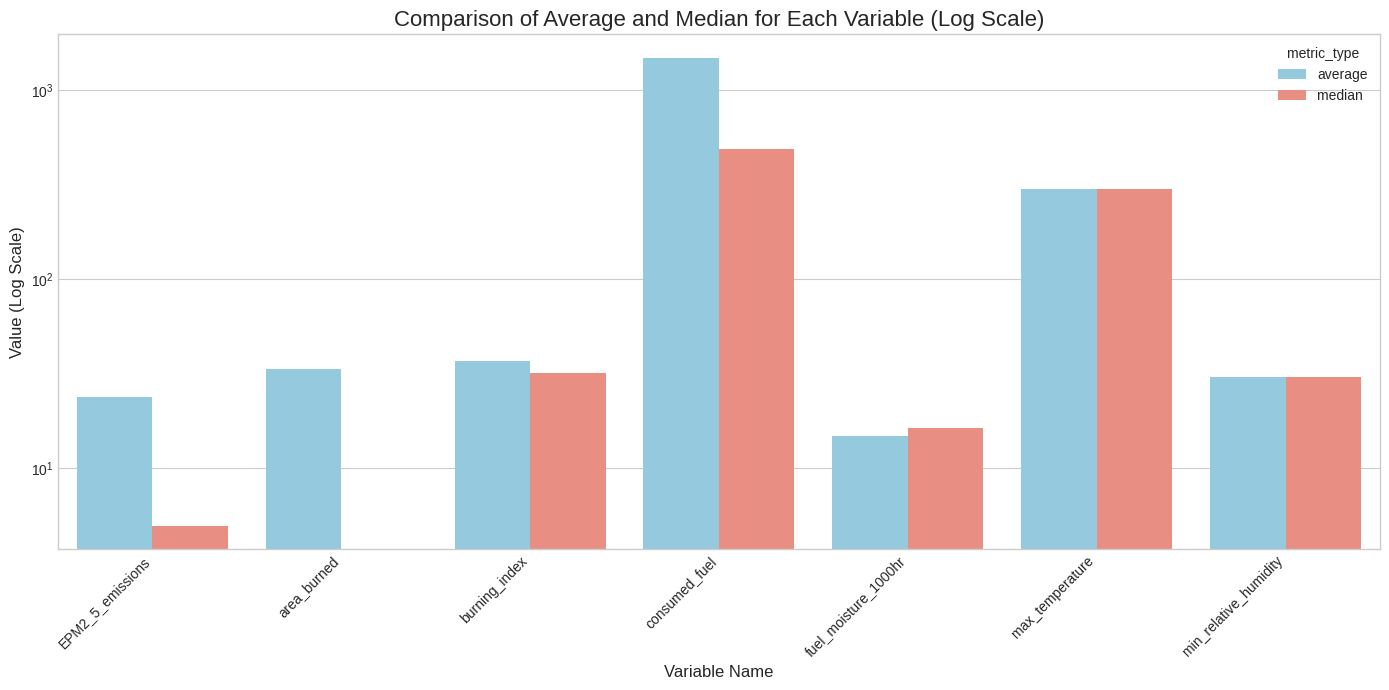


Generating Standard Deviation comparison plot...


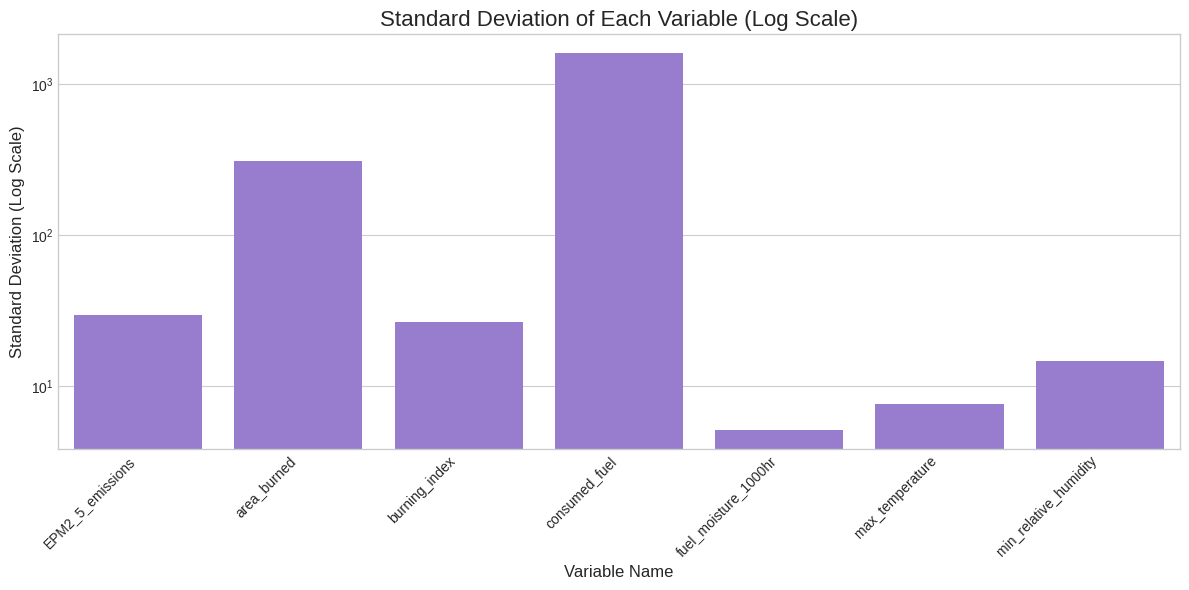

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = {
   'name': ['EPM2_5_emissions', 'area_burned', 'burning_index', 'consumed_fuel',
            'fuel_moisture_1000hr', 'max_temperature', 'min_relative_humidity'],
   'average': [23.71, 33.44, 37.02, 1482.81, 14.75, 297.93, 30.45],
   'std_deviation': [29.58, 311.73, 26.66, 1603.58, 5.12, 7.62, 14.71],
   'median': [4.96, 0, 32, 486.63, 16.40, 299.30, 30.40]
}
df_stats = pd.DataFrame(data)

plt.style.use('seaborn-v0_8-whitegrid')


df_melted = df_stats.melt(id_vars='name', value_vars=['average', 'median'],
                         var_name='metric_type', value_name='value')

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_melted, x='name', y='value', hue='metric_type', palette=['skyblue', 'salmon'])

ax.set_yscale('log')
ax.set_title('Comparison of Average and Median for Each Variable (Log Scale)', fontsize=16)
plt.xlabel('Variable Name', fontsize=12)
plt.ylabel('Value (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
ax_std = sns.barplot(data=df_stats, x='name', y='std_deviation', color='mediumpurple')

ax_std.set_yscale('log') #ax_std.set_title('Standard Deviation of Each Variable (Log Scale)', fontsize=16)
plt.xlabel('Variable Name', fontsize=12)
plt.ylabel('Standard Deviation (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Our Fire Problem has Two Speeds

Our data shows that we are dealing with two very different situations: the environment, which is relatively predictable, and the fires themselves, which are dangerously unpredictable.

Our entire strategy must be built around using our predictable environmental data to manage the extreme risk posed by the rare, catastrophic fires that cause nearly all the damage.

### The Predictable Environment: Our Knowns

The charts show that our key weather indicators—temperature, humidity, and fuel moisture—are stable and consistent.

This is good news. It means our foundational data is reliable. There are no wild, unpredictable swings in the daily weather patterns themselves. We can trust this data to build reliable forecasts and risk models.

### The Unpredictable Impact: Managing Extreme Risk

In sharp contrast, the data on fire outcomes—area burned, fuel consumed, and emissions—is extremely volatile and unpredictable.

This is the core challenge. Our business is not driven by the "average" fire; it's driven by a few massive, "black swan" events. The analysis shows that more than half of all fires cause almost no damage, while a tiny fraction of fires are responsible for nearly all the costs.

Planning for the "average" fire is a failing strategy. It's like an investment firm planning for an average day on the stock market—they would be completely wiped out by a market crash. We must focus our resources and attention on the extreme events.

### CORRELATION ANALYSIS

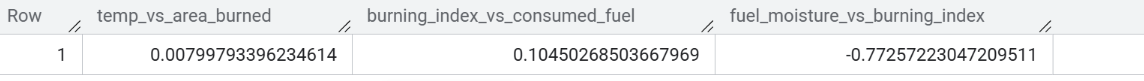

### fuel_moisture_vs_burning_index: -0.77

This is a strong negative correlation.

As fuel moisture goes up, the burning index goes down significantly. This is the clearest and most predictable relationship here. It makes perfect physical sense—wetter fuel is less flammable. This is a very reliable indicator in your dataset.

### burning_index_vs_consumed_fuel: 0.10

This is a weak positive correlation.

There is a slight tendency for more fuel to be consumed when the burning index is higher, but the relationship is not strong. This suggests that while the burning index plays a role, other factors are also critical in determining the final amount of fuel consumed. It's a piece of the puzzle, but not the whole story.

### temp_vs_area_burned: 0.008

This shows almost no linear correlation.

This is the most interesting result and highlights a key limitation. It does not mean that temperature has no effect on fire size. Instead, it means there is no simple, straight-line relationship between the two in the raw data.

Why? This result is caused by the extreme skewness of the area_burned data we discussed earlier. You have thousands of tiny fires (area near zero) that occurred across all temperature ranges. These points overwhelm the few massive fires, so the standard correlation calculation can't detect a clear trend. This is precisely why the log-transformed correlation analysis in the Python script is so important—it's designed to uncover these more complex relationships.